In [1]:
import numpy as np
import pandas as pd
#import geopandas
import time
from matplotlib.pyplot import *

In [2]:
%matplotlib notebook

In [3]:
# -------------------------------------------
# Load data from "add-geo-data.ipynb"
# -------------------------------------------
covid = pd.read_csv('covid19-withGeo.dat')

<IPython.core.display.Javascript object>


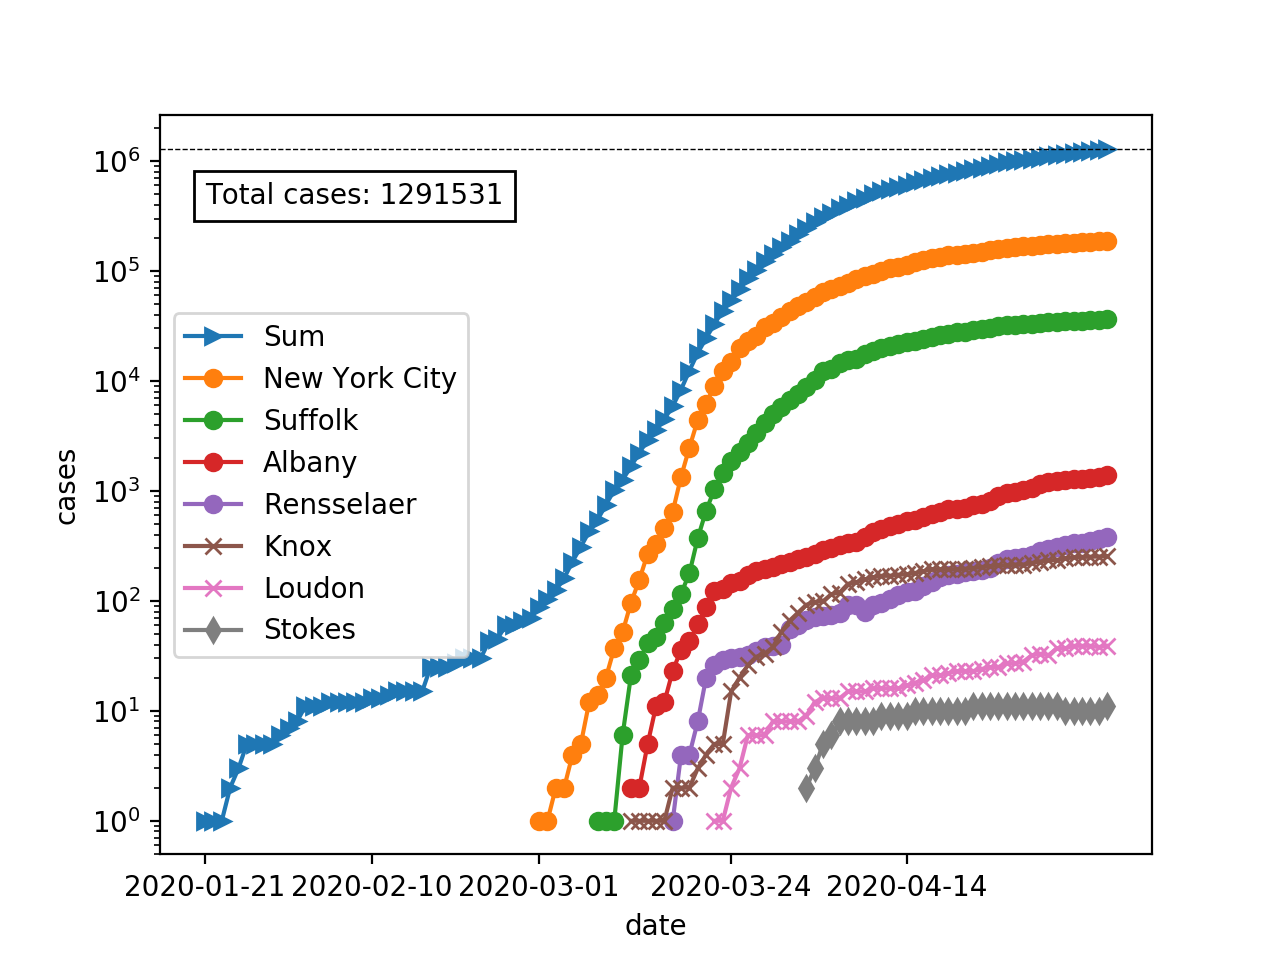

In [5]:
# -------------------------------------------
# Select a few different states
# -------------------------------------------
covidNY = covid[(covid.state == "New York")]
covidTN = covid[(covid.state == "Tennessee")]
covidNC = covid[(covid.state == "North Carolina")]
covidSUM = covid[['date','cases']].groupby('date').sum()
tot_cases = covidSUM.cases.max()

# -------------------------------------------
# List the counties for a given state to plot
# -------------------------------------------
county_listNY = ["New York City","Suffolk","Albany","Rensselaer"]#,'Nassau']
county_listTN = ["Knox","Loudon"]#,"Anderson","Roane"]
county_listNC = ["Stokes"]#,"Guilford"]
f = figure()
# plot sum
plot(covidSUM.index,covidSUM.cases,marker='>',label="Sum")
# -------------------------------------------
# plot county-by-county
# -------------------------------------------
for county in county_listNY:
    plot(covidNY[covidNY.county==county].date,covidNY[covidNY.county==county].cases,marker='o',label=county)
for county in county_listTN:
    plot(covidTN[covidTN.county==county].date,covidTN[covidTN.county==county].cases,marker='x',label=county)
for county in county_listNC:
    plot(covidNC[covidNC.county==county].date,covidNC[covidNC.county==county].cases,marker='d',label=county)
axhline(tot_cases,ls='--',lw=0.5,c='k')
tcks = ['2020-01-21','2020-02-10','2020-03-01','2020-03-24','2020-04-14']
xticks(tcks,tcks)
xlabel("date")
ylabel("cases")
yscale('log')
text('2020-01-21',tot_cases/2.0,'Total cases: {}'.format(tot_cases), fontsize=10,
        verticalalignment='top',bbox=dict(facecolor='white', alpha=1))
legend()
#savefig('images/case-plot',dpi=700,transparent=True)

In [5]:
# figure()
# plot(covidNY[covidNY.county=="New York City"].date,covidNY[covidNY.county=="New York City"].cases,marker='o')

In [6]:
#covidNY[covidNY.county=="New York City"]